# Experiment 2: Implementation of CNN




###c) Handwritten digits classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train[0].shape

(28, 28)

matshow() function is used to represent an array as a matrix in a new figure window. the upper left-hand corner is set as the origin and the rows are displayed in a horizontal form. 

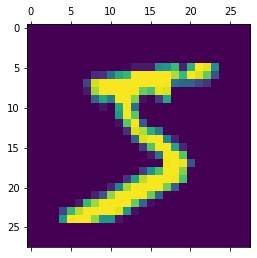

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Using ANN for classification

The flatten() function is used to get a copy of an given array collapsed into one dimension. Adam optimizer are used.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2769 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0522 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0422 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0337 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0816 - accuracy: 0.9765


[0.08160112053155899, 0.9764999747276306]

In [ ]:
Reshaping X_train

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

Reshaping X_test

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

Using CNN for classification

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [ ]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

Adam optimizer are used

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1557 - accuracy: 0.9536
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0340 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0161 - accuracy: 0.9945


In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9874


[0.03870362043380737, 0.9873999953269958]